In [175]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



In [176]:
data=pd.read_excel("first inten project.xlsx")
data = data.drop(columns=["Booking_ID"])

In [177]:
data.shape

(36285, 16)

In [178]:
data.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price', 'special requests', 'date of reservation',
       'booking status'],
      dtype='object')

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  date o

In [180]:
data.sort_values(by="P-C",ascending=False)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
12109,2,0,1,1,Meal Plan 1,0,Room_Type 1,190,Offline,1,13,1,70.00,0,2018-04-09 00:00:00,Canceled
30833,2,0,1,1,Meal Plan 1,0,Room_Type 1,190,Offline,1,13,1,70.00,0,2018-04-09 00:00:00,Canceled
12097,2,0,1,1,Meal Plan 1,0,Room_Type 1,190,Offline,1,13,1,70.00,0,2018-04-09 00:00:00,Canceled
16277,2,0,1,1,Meal Plan 1,0,Room_Type 1,190,Offline,1,13,1,70.00,0,2018-04-09 00:00:00,Canceled
28914,2,0,2,2,Meal Plan 1,0,Room_Type 4,1,Online,1,11,20,106.00,1,2018-01-29 00:00:00,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12149,1,0,1,3,Meal Plan 1,0,Room_Type 1,29,Online,0,0,0,97.33,0,2018-04-18 00:00:00,Not_Canceled
12150,2,0,0,2,Meal Plan 1,0,Room_Type 1,317,Offline,0,0,0,120.00,0,2018-09-15 00:00:00,Canceled
12151,1,0,0,2,Meal Plan 1,0,Room_Type 1,21,Corporate,0,0,0,65.00,0,2017-12-17 00:00:00,Not_Canceled
12152,3,0,2,1,Meal Plan 1,0,Room_Type 4,87,Online,0,0,0,141.90,0,2018-10-23 00:00:00,Not_Canceled


In [181]:
data.isnull().sum()

,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0
repeated,0


In [182]:
le=LabelEncoder()
categorical_columns=["booking status","type of meal","market segment type","room type"]

for col in categorical_columns:
    data[col]=le.fit_transform(data[col])



In [183]:
data.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,2015-10-02 00:00:00,1
1,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,2018-11-06 00:00:00,1
2,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,2018-02-28 00:00:00,0
3,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,2017-05-20 00:00:00,0
4,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,2018-04-11 00:00:00,0


In [184]:
data.groupby("market segment type")["booking status"].value_counts()

market segment type  booking status
0                    1                    88
                     0                    37
1                    1                   391
2                    1                  1797
                     0                   220
3                    1                  7377
                     0                  3154
4                    1                 14743
                     0                  8478
Name: count, dtype: int64

In [185]:
data["date of reservation"] = data["date of reservation"].str.replace(
    "2018-2-29", "2018-2-28")
data["date of reservation"]=pd.to_datetime(data["date of reservation"])


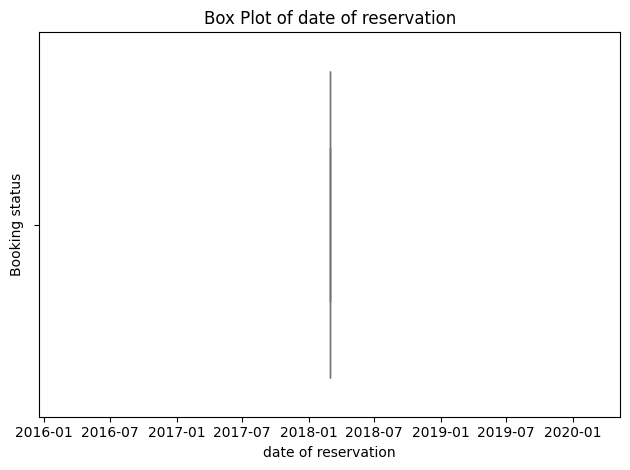

In [186]:
sns.boxplot(x=data["date of reservation"], color='lightgreen')
plt.title(f'Box Plot of date of reservation')
plt.ylabel("Booking status")
plt.tight_layout()
plt.show()

In [187]:
corr = data.corr()  # computes Pearson correlation matrix
target_corr = corr["booking status"].sort_values(ascending=False)
print(target_corr)

booking status              1.000000
special requests            0.253092
repeated                    0.107277
car parking space           0.086179
P-not-C                     0.060174
P-C                         0.033725
date of reservation         0.009425
room type                  -0.022877
type of meal               -0.026772
number of children         -0.033007
number of weekend nights   -0.061489
number of adults           -0.086774
number of week nights      -0.092824
market segment type        -0.136005
average price              -0.142433
lead time                  -0.438491
Name: booking status, dtype: float64


In [188]:
data["reservation_month"] = data["date of reservation"].dt.month
data["reservation_day"] = data["date of reservation"].dt.day
data["reservation_dayofweek"] = data["date of reservation"].dt.dayofweek
data["is_weekend"] = data["reservation_dayofweek"].isin([5,6]).astype(int)


In [189]:
data[["reservation_month","reservation_day","is_weekend","reservation_dayofweek"]].isnull().sum()
#month,day is not in format so columns can't created

,0
reservation_month,36248
reservation_day,36248
is_weekend,0
reservation_dayofweek,36248


In [190]:
corr = data.corr()  # computes Pearson correlation matrix
target_corr = corr["booking status"].sort_values(ascending=False)
print(target_corr)

booking status              1.000000
special requests            0.253092
repeated                    0.107277
car parking space           0.086179
P-not-C                     0.060174
P-C                         0.033725
date of reservation         0.009425
room type                  -0.022877
type of meal               -0.026772
number of children         -0.033007
number of weekend nights   -0.061489
number of adults           -0.086774
number of week nights      -0.092824
market segment type        -0.136005
average price              -0.142433
lead time                  -0.438491
reservation_month                NaN
reservation_day                  NaN
reservation_dayofweek            NaN
is_weekend                       NaN
Name: booking status, dtype: float64


In [191]:
data = data.drop(columns=["P-C","date of reservation","room type","type of meal","number of children","reservation_month","reservation_day","reservation_dayofweek","is_weekend"])

In [192]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data_scaled = scaler.fit_transform(data)

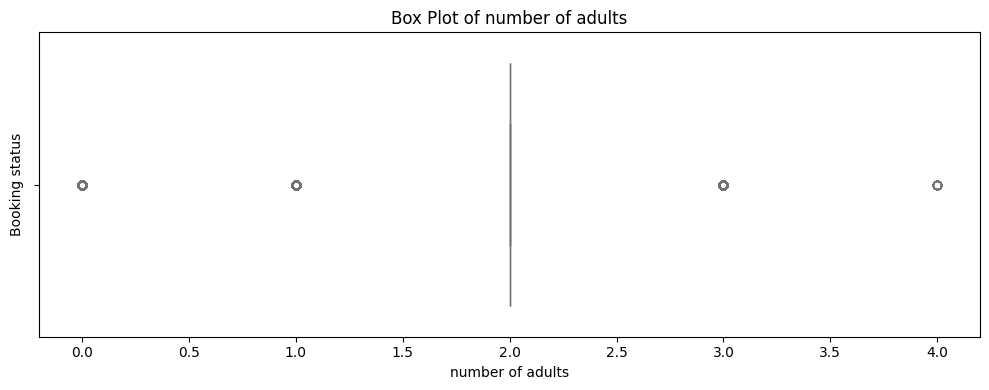

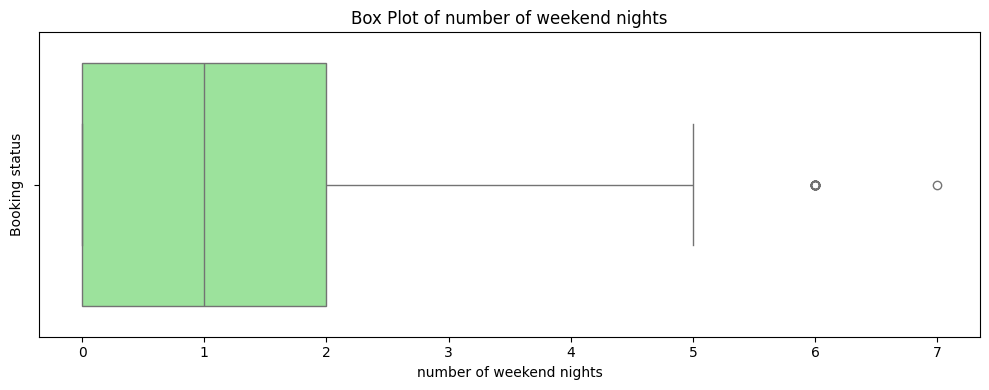

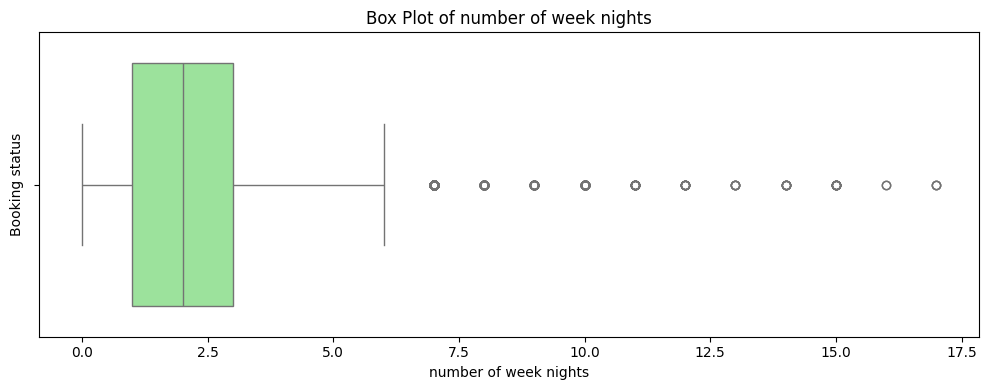

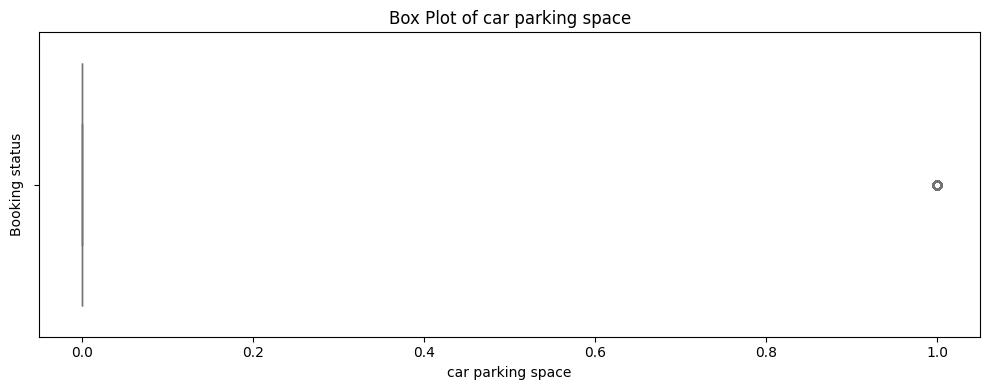

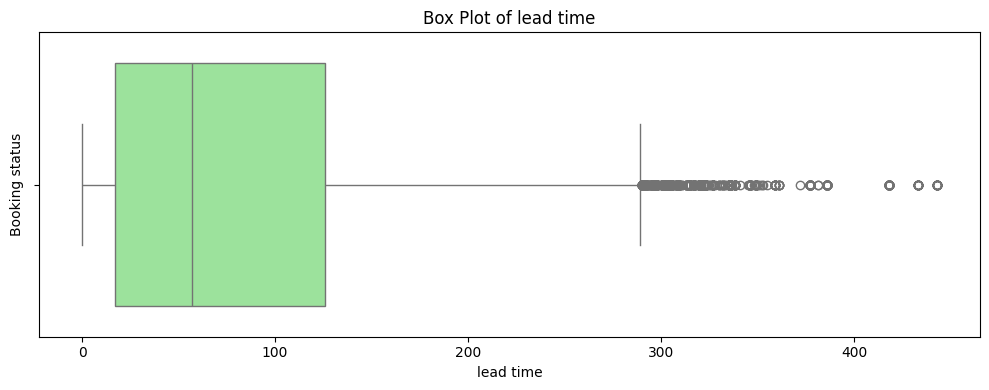

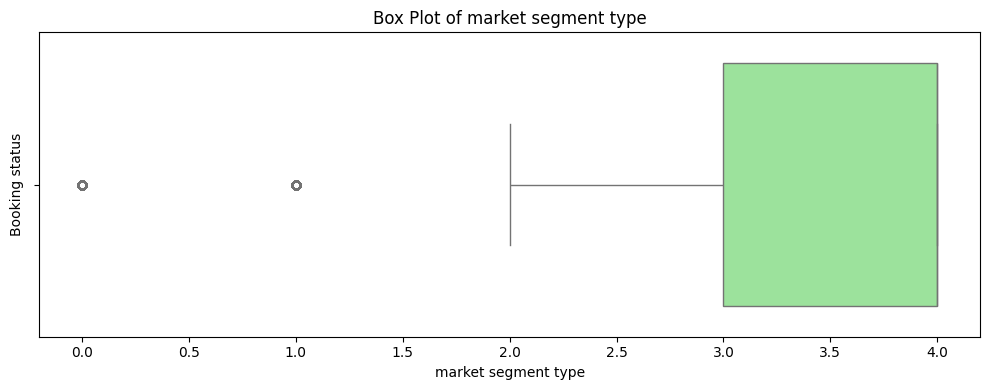

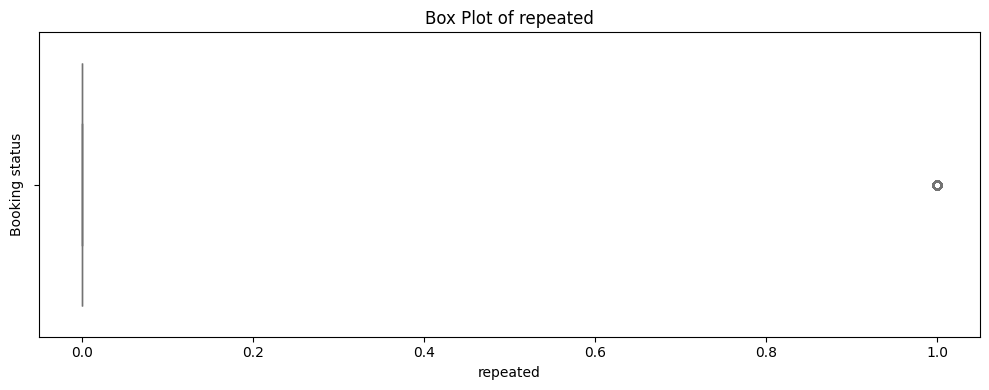

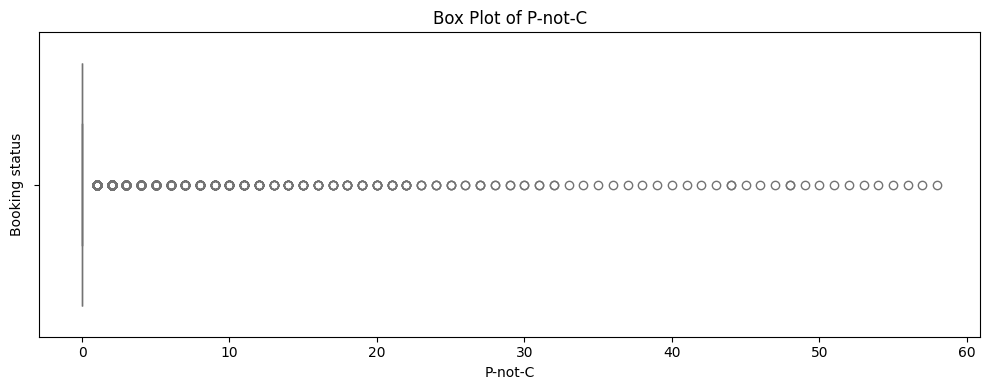

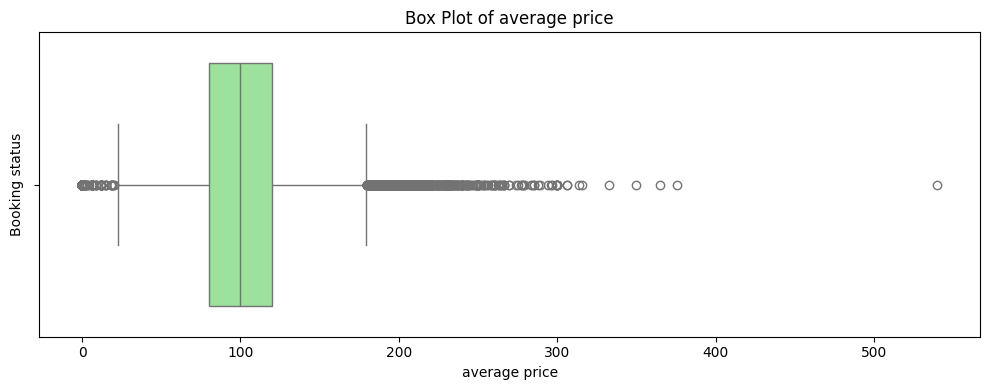

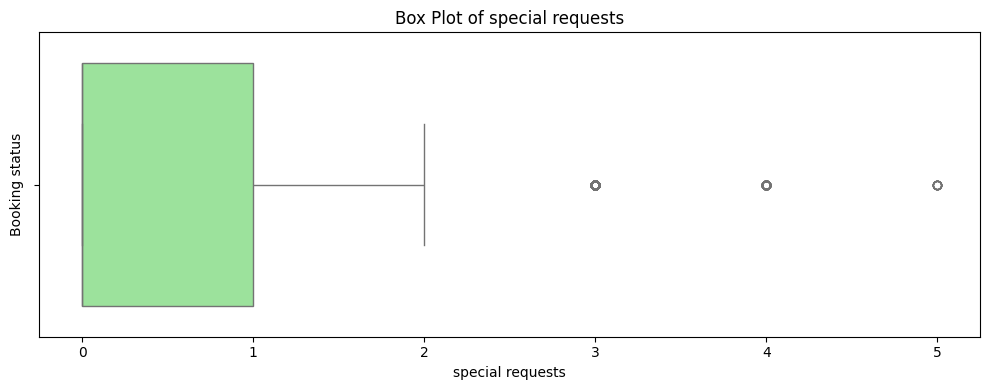

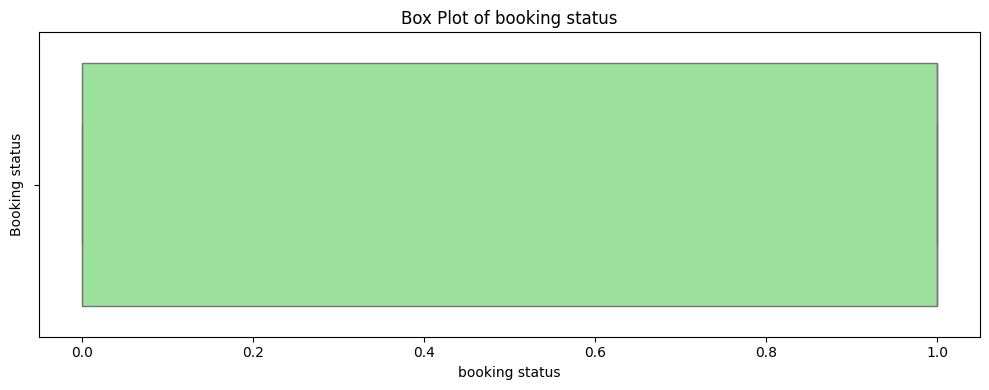

In [193]:
for col in data.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
    plt.ylabel("Booking status")
    plt.tight_layout()
    plt.show()

In [194]:
X = data.drop(columns=["booking status"])
y = data["booking status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)